<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [7]:
import os

# Crear la carpeta si no existe
if not os.path.exists("data"):
    os.makedirs("data")


In [8]:
# Librerias
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos
# Asegúrate de que la carpeta 'data' ya exista o crea una antes de ejecutar este código
lfw_dataset = fetch_lfw_people(data_home="data", min_faces_per_person=25)




(Utilice este espacio para describir su procedimiento)

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [9]:
# Utilice este espacio para escribir el código.
lfw_dataset.DESCR

".. _labeled_faces_in_the_wild_dataset:\n\nThe Labeled Faces in the Wild face recognition dataset\n------------------------------------------------------\n\nThis dataset is a collection of JPEG pictures of famous people collected\nover the internet, all details are available on the official website:\n\nhttp://vis-www.cs.umass.edu/lfw/\n\nEach picture is centered on a single face. The typical task is called\nFace Verification: given a pair of two pictures, a binary classifier\nmust predict whether the two images are from the same person.\n\nAn alternative task, Face Recognition or Face Identification is:\ngiven the picture of the face of an unknown person, identify the name\nof the person by referring to a gallery of previously seen pictures of\nidentified persons.\n\nBoth Face Verification and Face Recognition are tasks that are typically\nperformed on the output of a model trained to perform Face Detection. The\nmost popular model for Face Detection is called Viola-Jones and is\nimple

In [10]:
lfw_dataset.images

array([[[0.18954249, 0.17254902, 0.17908497, ..., 0.24444444,
         0.24575163, 0.23921569],
        [0.17254902, 0.15686275, 0.16732027, ..., 0.2535948 ,
         0.23137255, 0.25490198],
        [0.151634  , 0.17124183, 0.20522876, ..., 0.26928106,
         0.24705882, 0.23921569],
        ...,
        [0.43529412, 0.4130719 , 0.37254903, ..., 0.9019608 ,
         0.90718955, 0.8732026 ],
        [0.41699347, 0.38039216, 0.34117648, ..., 0.9006536 ,
         0.88758165, 0.8470588 ],
        [0.4013072 , 0.35686275, 0.3019608 , ..., 0.882353  ,
         0.8627451 , 0.8104575 ]],

       [[0.53464055, 0.3124183 , 0.23006536, ..., 0.45228758,
         0.3908497 , 0.351634  ],
        [0.40392157, 0.2522876 , 0.2640523 , ..., 0.46797386,
         0.39607844, 0.36078432],
        [0.32941177, 0.2653595 , 0.303268  , ..., 0.4797386 ,
         0.37254903, 0.3385621 ],
        ...,
        [0.05751634, 0.0875817 , 0.10196079, ..., 0.92156863,
         0.91764706, 0.6562092 ],
        [0.0

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

In [13]:
# Utilice este espacio para escribir el código.
# Crear un DataFrame para análisis
df = pd.DataFrame({
    "person_id": lfw_dataset.target,
    "person_name": [lfw_dataset.target_names[i] for i in lfw_dataset.target]
})

# Calcular la distribución de imágenes por persona
distribution = df['person_name'].value_counts()

# Mostrar la distribución
print(distribution)


person_name
George W Bush                530
Colin Powell                 236
Tony Blair                   144
Donald Rumsfeld              121
Gerhard Schroeder            109
Ariel Sharon                  77
Hugo Chavez                   71
Junichiro Koizumi             60
Jean Chretien                 55
John Ashcroft                 53
Jacques Chirac                52
Serena Williams               52
Vladimir Putin                49
Luiz Inacio Lula da Silva     48
Gloria Macapagal Arroyo       44
Arnold Schwarzenegger         42
Jennifer Capriati             42
Lleyton Hewitt                41
Laura Bush                    41
Alejandro Toledo              39
Hans Blix                     39
Nestor Kirchner               37
Andre Agassi                  36
Alvaro Uribe                  35
Megawati Sukarnoputri         33
Silvio Berlusconi             33
Tom Ridge                     33
Roh Moo-hyun                  32
Kofi Annan                    32
Vicente Fox                   3

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Número de imágenes de Serena Williams: 52


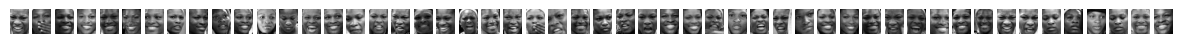

In [16]:
# Utilice este espacio para escribir el código.
# Suponiendo que tengas acceso al dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=1)  # Ajustar según sea necesario

# Encuentra el índice para Serena Williams
serena_index = [i for i, name in enumerate(lfw_dataset.target_names) if "Serena Williams" in name]

if serena_index:
    serena_images = lfw_dataset.images[lfw_dataset.target == serena_index[0]]

    # Contar las imágenes
    print(f"Número de imágenes de Serena Williams: {len(serena_images)}")

    # Mostrar las imágenes
    fig, axes = plt.subplots(1, len(serena_images), figsize=(15, 5))
    for ax, img in zip(axes, serena_images):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()
else:
    print("No se encontraron imágenes de Serena Williams en el dataset.")


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

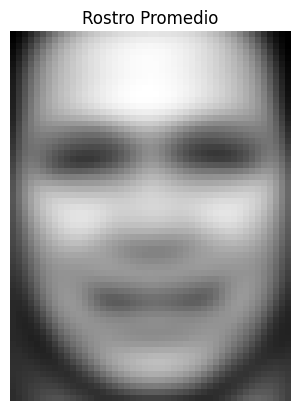

In [17]:
# Utilice este espacio para escribir el código.

# Cargar el dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=1)  # Ajusta este valor según necesites

# Obtener la matriz de imágenes y calcular el rostro promedio
# Las imágenes están en lfw_dataset.images y tienen forma (n_imagenes, altura, anchura)
# Necesitas cambiar la forma a (n_imagenes, altura*anchura) para hacer el promedio por columna
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)

# Cambiar la forma del rostro promedio para hacerlo compatible con imshow
face_average_image = face_average.reshape(height, width)

# Mostrar el rostro promedio
plt.imshow(face_average_image, cmap='gray')
plt.title("Rostro Promedio")
plt.axis('off')  # Ocultar los ejes
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

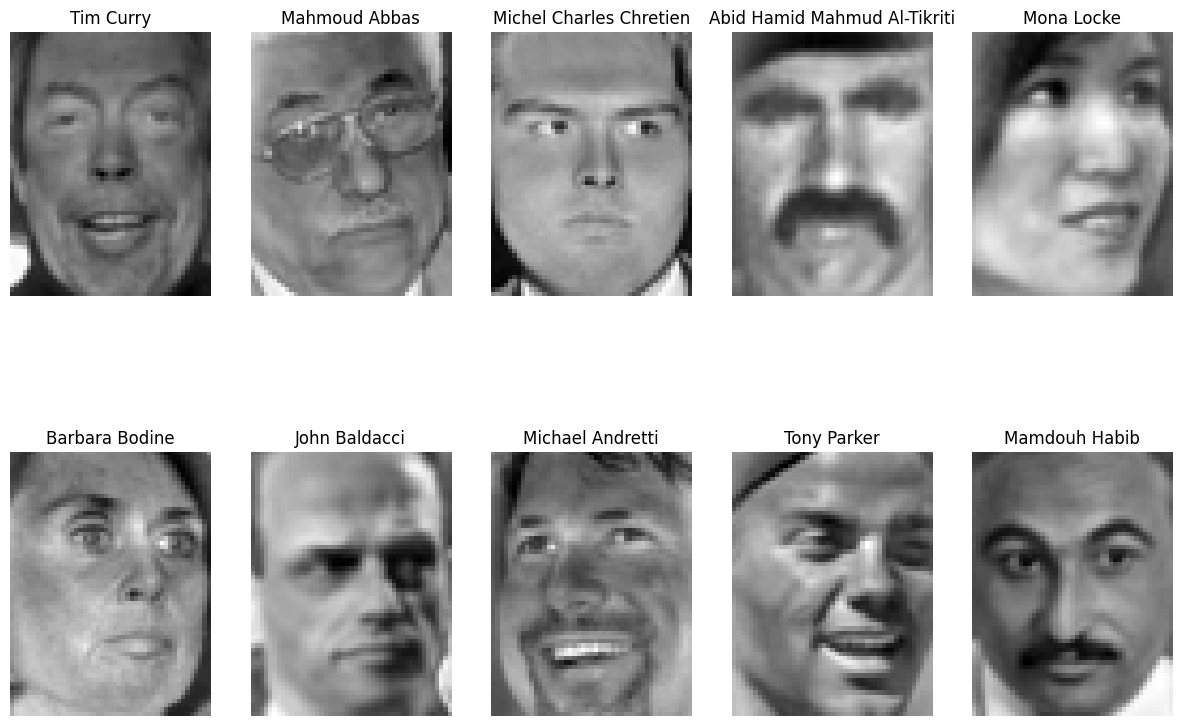

In [19]:
# Utilice este espacio para escribir el código.

# Calcular el rostro promedio
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)  # Convertir imágenes a vectores
face_average = X.mean(axis=0)  # Promedio de cada columna

# Restar el rostro promedio de cada imagen
X_centered = X - face_average

# Volver a dar forma a las imágenes centradas para visualización
images_centered = X_centered.reshape(n_images, height, width)

# Mostrar algunas de las imágenes centradas
plt.figure(figsize=(15, 10))
for i in range(10):  # Mostrar las primeras 10 imágenes centradas
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_centered[i], cmap='gray')
    plt.title(lfw_dataset.target_names[lfw_dataset.target[i]])
    plt.axis('off')
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

In [20]:
# Utilice este espacio para escribir el código.

# Cargar el dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=1)

# Calcular el rostro promedio y centrar las imágenes
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)
X_centered = X - face_average

# Aplicar SVD a las imágenes centradas
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Retener los primeros K=1000 valores singulares
K = 1000
S_k = S[:K]

# Calcular la proporción de la varianza explicada por los primeros K valores singulares
total_variance = np.sum(S**2)
explained_variance_k = np.sum(S_k**2)
proportion_variance_explained = explained_variance_k / total_variance

proportion_variance_explained


0.9962349

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

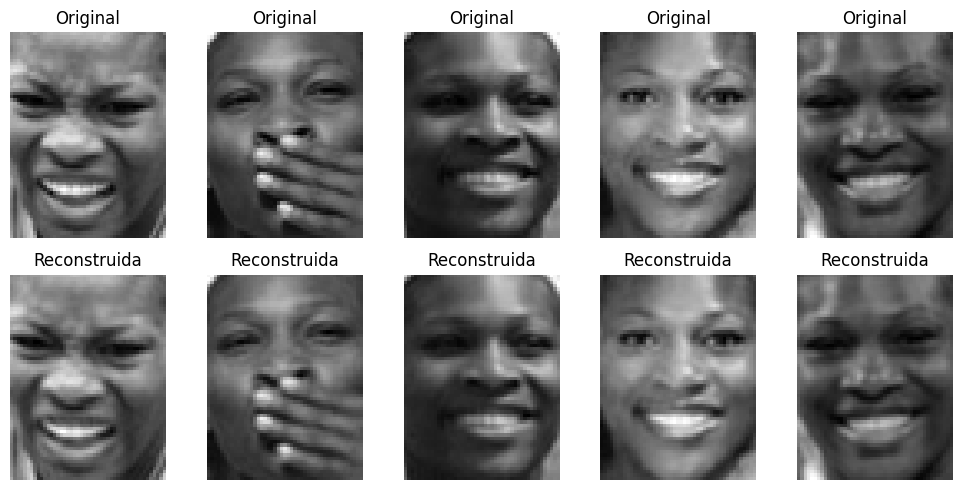

In [21]:
# Utilice este espacio para escribir el código.
# Calcular el rostro promedio y centrar las imágenes
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)
X_centered = X - face_average

# Aplicar SVD a las imágenes centradas
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Retener los primeros K=1000 componentes
K = 1000
U_k = U[:, :K]
S_k = S[:K]
Vt_k = Vt[:K, :]

# Encontrar las imágenes de Serena Williams
serena_indices = [i for i, name in enumerate(lfw_dataset.target_names) if "Serena Williams" in name]
serena_images = X[lfw_dataset.target == serena_indices[0]]  # Imágenes originales
serena_images_centered = X_centered[lfw_dataset.target == serena_indices[0]]

# Reconstruir las imágenes de Serena Williams usando los K componentes
serena_images_reconstructed = np.dot(serena_images_centered.dot(Vt_k.T), Vt_k) + face_average

# Visualizar las imágenes originales y reconstruidas de Serena Williams
plt.figure(figsize=(10, 5))
for i in range(min(len(serena_images), 5)):  # Mostrar solo las primeras 5 imágenes
    # Imagen original
    plt.subplot(2, 5, i + 1)
    plt.imshow(serena_images[i].reshape(height, width), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Imagen reconstruida
    plt.subplot(2, 5, i + 6)
    plt.imshow(serena_images_reconstructed[i].reshape(height, width), cmap='gray')
    plt.title("Reconstruida")
    plt.axis('off')
plt.tight_layout()
plt.show()


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [22]:
# Utilice este espacio para escribir el código.

# Crear una variable binaria para las imágenes de George W. Bush
target_bush = (lfw_dataset.target_names[lfw_dataset.target] == 'George W Bush').astype(int)

# Mostrar el balance de las clases
print("Distribución de clases:")
print(np.bincount(target_bush))


Distribución de clases:
[12703   530]


In [23]:
# Calcular el rostro promedio y centrar las imágenes
n_images, height, width = lfw_dataset.images.shape
X = lfw_dataset.images.reshape(n_images, height * width)
face_average = X.mean(axis=0)
X_centered = X - face_average

# Aplicar SVD
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Usar los primeros K=1000 componentes
K = 1000
X_reduced = U[:, :K] * S[:K]


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, target_bush, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9722921914357683
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3823
           1       0.69      0.46      0.55       147

    accuracy                           0.97      3970
   macro avg       0.83      0.73      0.77      3970
weighted avg       0.97      0.97      0.97      3970



(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [25]:
# Utilice este espacio para escribir el código.

from sklearn.model_selection import train_test_split

# Asumiendo que X_reduced y target_bush ya están definidos como se describió antes
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced,        # Datos de características reducidas
    target_bush,      # Etiquetas binarias (1 para George W. Bush, 0 para otros)
    test_size=0.2,    # 20% de los datos para prueba
    random_state=10101 # Estado aleatorio para reproducibilidad
)

# Imprimir las dimensiones para confirmar la división
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)


Dimensiones del conjunto de entrenamiento: (10586, 1000)
Dimensiones del conjunto de prueba: (2647, 1000)


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [26]:
# Utilice este espacio para escribir el código.
import numpy as np

# Calcular el promedio del conjunto de entrenamiento
mean_train = np.mean(X_train, axis=0)

# Recentralizar los conjuntos de entrenamiento y prueba
X_train_centered = X_train - mean_train
X_test_centered = X_test - mean_train


In [28]:
from numpy.linalg import svd

# Aplicar SVD al conjunto de entrenamiento centrado
U_train, S_train, Vt_train = svd(X_train_centered, full_matrices=False)


In [29]:
# Transformar el conjunto de prueba usando los vectores de la SVD de entrenamiento
X_test_transformed = X_test_centered.dot(Vt_train.T)


In [30]:
# Mostrar dimensiones para confirmar los tamaños
print("Dimensiones transformadas de entrenamiento:", X_train_centered.shape)
print("Dimensiones transformadas de prueba:", X_test_transformed.shape)

Dimensiones transformadas de entrenamiento: (10586, 1000)
Dimensiones transformadas de prueba: (2647, 1000)


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [34]:
# Reducir la dimensionalidad de los conjuntos de entrenamiento y prueba
X_train_reduced = X_train_centered.dot(Vt_train[:1000].T)
X_test_reduced = X_test_centered.dot(Vt_train[:1000].T)


In [36]:
from sklearn.linear_model import LogisticRegression

Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)
Modelo_Logistico.fit(X_train_reduced, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predecir en el conjunto de prueba
y_pred = Modelo_Logistico.predict(X_test_reduced)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Others', 'George W Bush'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(report)


# Utilice este espacio para escribir el código restante.

Confusion Matrix:
[[2522   29]
 [  52   44]]

Accuracy: 0.9693993199848886

Classification Report:
               precision    recall  f1-score   support

       Others       0.98      0.99      0.98      2551
George W Bush       0.60      0.46      0.52        96

     accuracy                           0.97      2647
    macro avg       0.79      0.72      0.75      2647
 weighted avg       0.97      0.97      0.97      2647



(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [37]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Definir el rango de valores singulares a probar
n_components = [50, 100, 150, 200, 300, 400, 500, 750, 1000]

# Crear un pipeline que incluya SVD y regresión logística
pipeline = Pipeline([
    ('svd', TruncatedSVD(random_state=10101)),
    ('log_reg', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
])

# Definir los parámetros para GridSearchCV
param_grid = {
    'svd__n_components': n_components
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)


In [38]:
# Entrenar usando validación cruzada
grid_search.fit(X_train_centered, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................svd__n_components=50; total time=   0.6s
[CV] END ...............................svd__n_components=50; total time=   0.4s
[CV] END ...............................svd__n_components=50; total time=   0.5s
[CV] END ...............................svd__n_components=50; total time=   0.5s
[CV] END ...............................svd__n_components=50; total time=   0.5s
[CV] END ..............................svd__n_components=100; total time=   1.4s
[CV] END ..............................svd__n_components=100; total time=   1.0s
[CV] END ..............................svd__n_components=100; total time=   1.0s
[CV] END ..............................svd__n_components=100; total time=   0.7s
[CV] END ..............................svd__n_components=100; total time=   1.3s
[CV] END ..............................svd__n_components=150; total time=   2.2s
[CV] END ..............................svd__n_com

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('svd',
                                        TruncatedSVD(random_state=10101)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=10101,
                                                           solver='sag'))]),
             param_grid={'svd__n_components': [50, 100, 150, 200, 300, 400, 500,
                                               750, 1000]},
             scoring='accuracy', verbose=2)

In [39]:
# Obtener el mejor número de componentes y el mejor modelo
best_n_components = grid_search.best_estimator_.get_params()['svd__n_components']
best_model = grid_search.best_estimator_

print("Mejor número de componentes principales:", best_n_components)

# Evaluar en el conjunto de prueba
X_test_centered = X_test - mean_train
y_pred = best_model.predict(X_test_centered)

# Calcular y mostrar la precisión para la clase George W Bush
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en el conjunto de prueba:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Others', 'George W Bush']))


Mejor número de componentes principales: 200
Accuracy en el conjunto de prueba: 0.9682659614658103

Classification Report:
               precision    recall  f1-score   support

       Others       0.98      0.99      0.98      2551
George W Bush       0.60      0.39      0.47        96

     accuracy                           0.97      2647
    macro avg       0.79      0.69      0.73      2647
 weighted avg       0.96      0.97      0.96      2647



(Utilice este espacio para describir el procedimiento, análisis y conclusiones).